In [1]:
# 1. Import data libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
#download the weather images and put them in a directory
path = r"C:\Users\Quinn\Documents\CF - Data Analysis\Machine Learning\Multi-class Weather Dataset"
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [3]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [4]:
# 4. Create CNN model
#this is a CNN to categorize the weather images

epochs = 45  # Increase epochs
dropout_rate = 0.5  # Adjust dropout rate
learning_rate = 0.001  # Adjust learning rate

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(dropout_rate,seed=5)(x)  # Adjusted dropout rate
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [7]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer=Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"]) #mean_squared_error
model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=test_generator,
)

Epoch 1/45


C:\Users\Quinn\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 634ms/step - accuracy: 0.4723 - loss: 1.0892 - val_accuracy: 0.6518 - val_loss: 0.7029
Epoch 2/45
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 493ms/step - accuracy: 0.6587 - loss: 0.7465 - val_accuracy: 0.7857 - val_loss: 0.5975
Epoch 3/45
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 495ms/step - accuracy: 0.7305 - loss: 0.5817 - val_accuracy: 0.7991 - val_loss: 0.5337
Epoch 4/45
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 493ms/step - accuracy: 0.8243 - loss: 0.4549 - val_accuracy: 0.7098 - val_loss: 0.6436
Epoch 5/45
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 520ms/step - accuracy: 0.8298 - loss: 0.4934 - val_accuracy: 0.7679 - val_loss: 0.5903
Epoch 6/45
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 549ms/step - accuracy: 0.8084 - loss: 0.4812 - val_accuracy: 0.8170 - val_loss: 0.4654
Epoch 7/45
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 532ms/step - accuracy: 0.8804 - loss: 0.2853 - val_accuracy: 0.8482 - val_loss: 0.4041
Epoch 8/45
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 530ms/step - accuracy: 0.8908 - loss: 0.2904 - val_accuracy: 0.817

#### Note: 94% convergence at [45] epochs

In [8]:
# 5. Plot accuracy and loss
results = pd.DataFrame(model.history.history)

<Axes: title={'center': 'Model Loss - 45 Epochs'}>

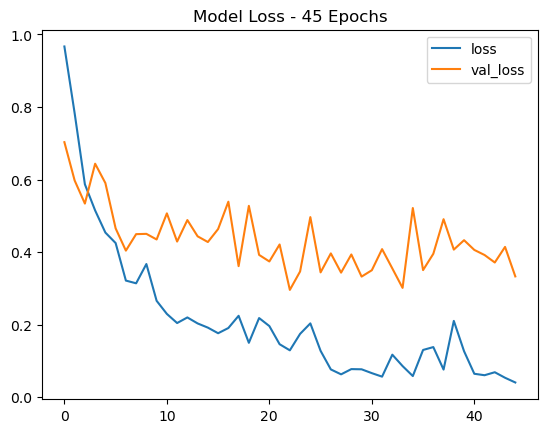

In [10]:
results[['loss','val_loss']].plot(title='Model Loss - 45 Epochs')

#### Loss and Val_loss decreased steadily and reach minimum at 45 epochs

<Axes: title={'center': 'Model Acurracy -  Epochs'}>

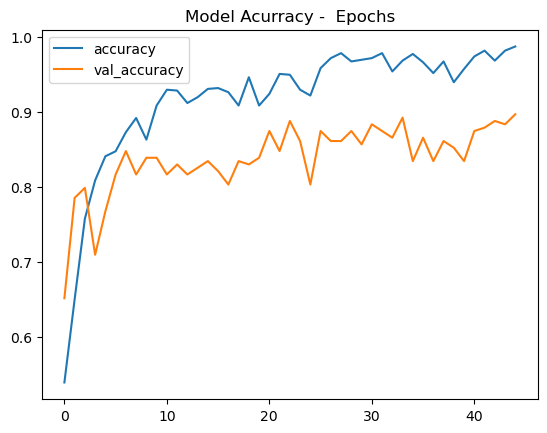

In [11]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy -  Epochs')

#### Accuracy and Val_accuracy increased steadily and reach maximum at 45 epochs

In [12]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

# Validation accuracy should typically be a non-zero value between 0 and 1, representing the model's performance on a separate validation dataset.

Accuracy: 0.9877913594245911, Val_Accuracy: 0.8973214030265808
Loss: 0.040776755660772324, Val_Loss: 0.3330481946468353


#### The model worked well with high accuracy and low loss

46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step


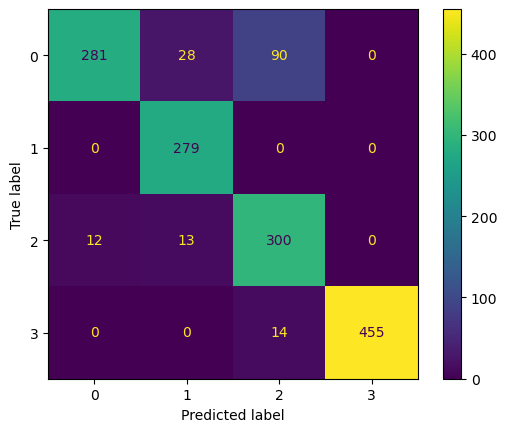

In [14]:
# 5. Display confusion matrix
#collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 45 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [15]:
# 6. Generate images and their predictions
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


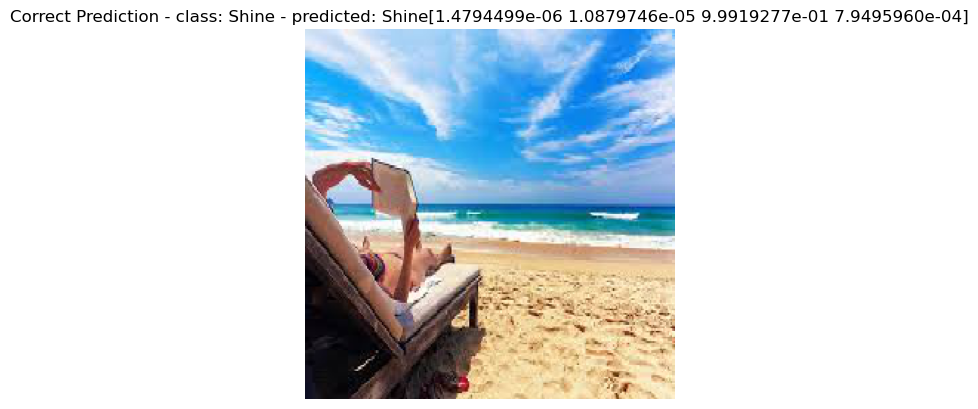

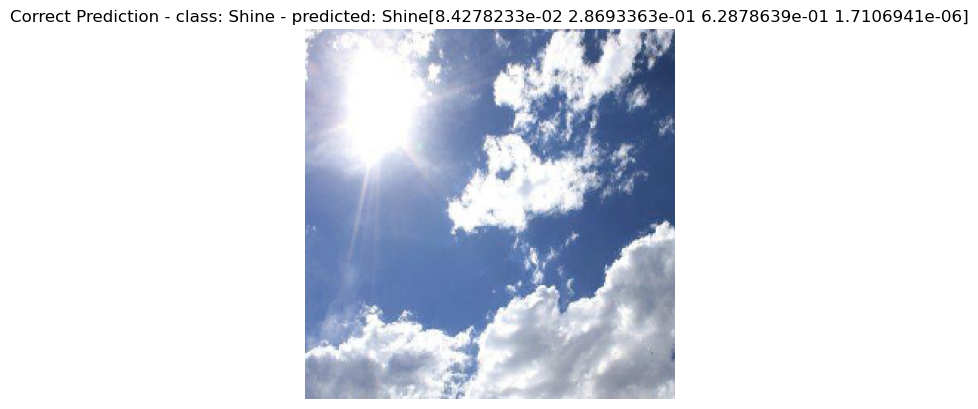

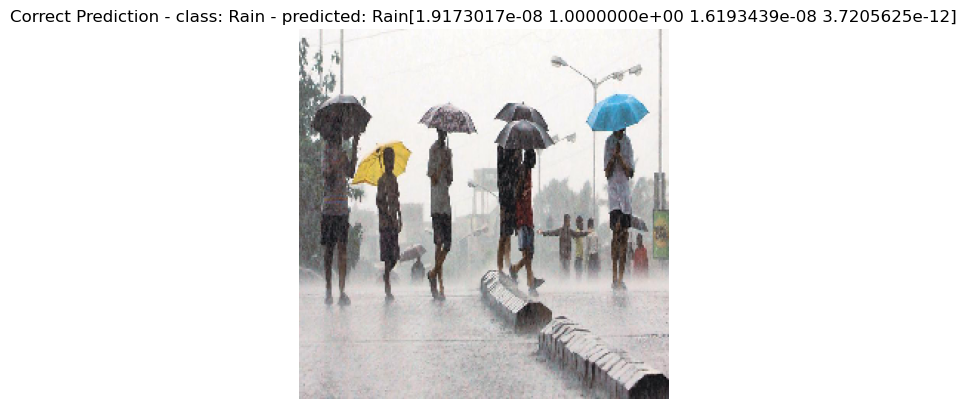

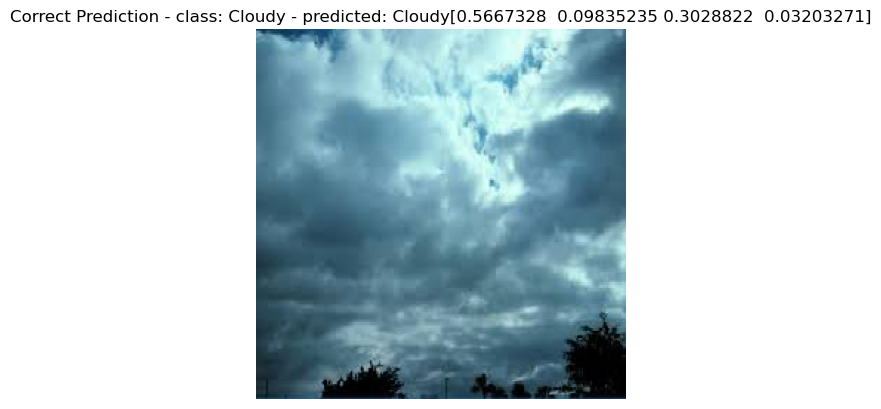

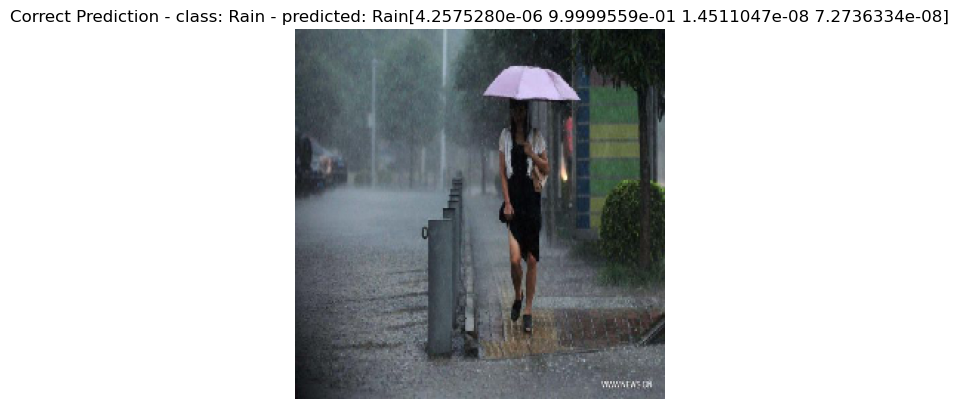

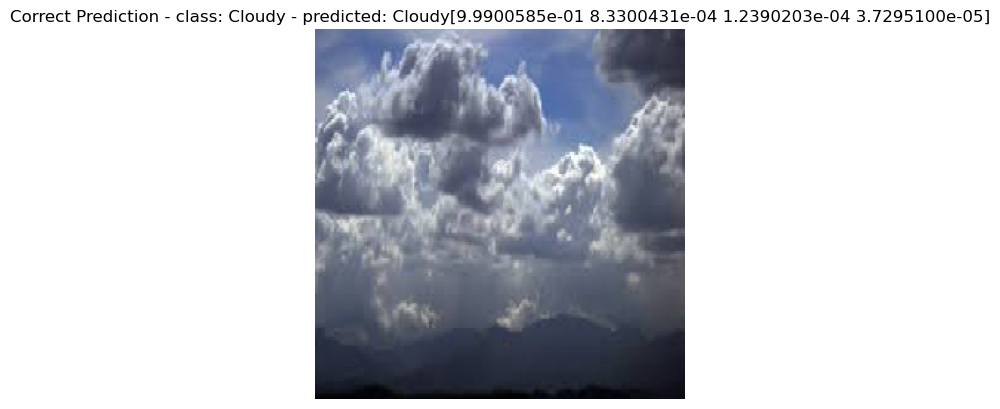

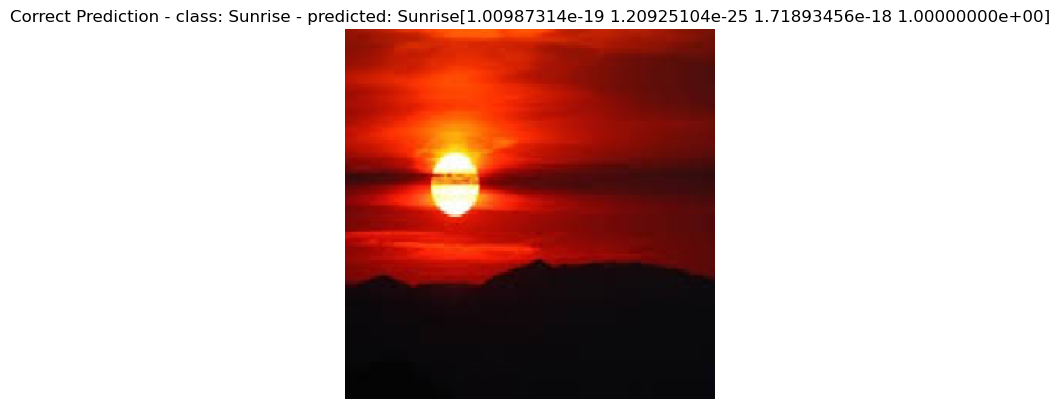

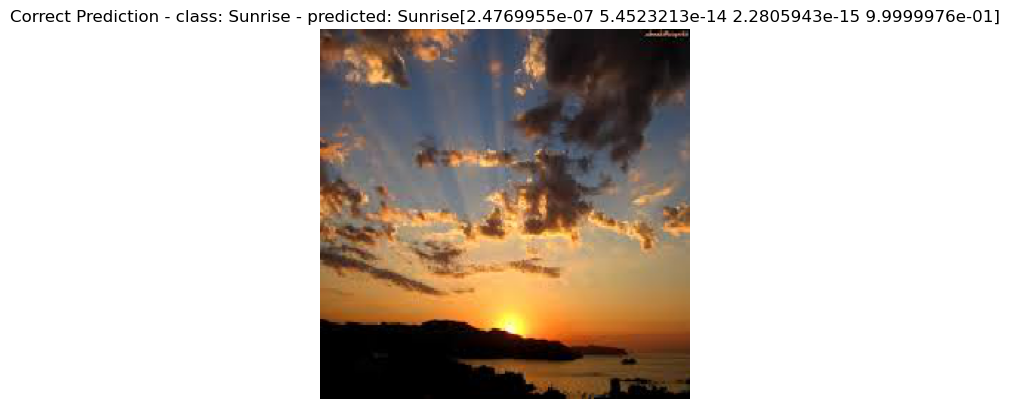

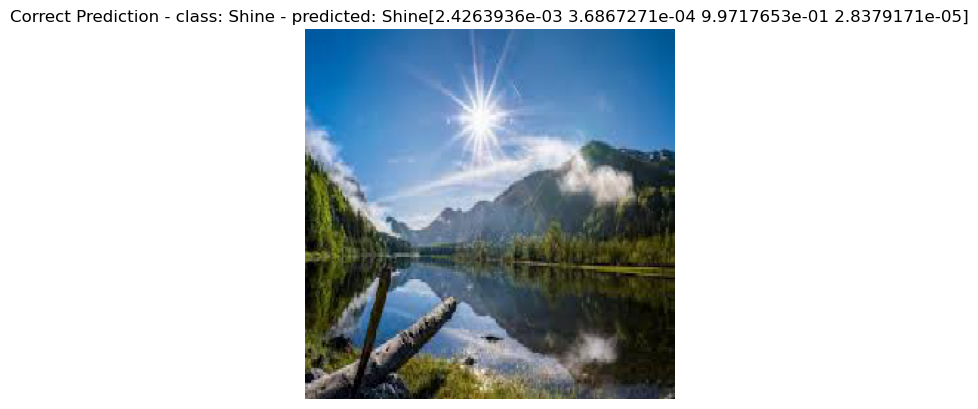

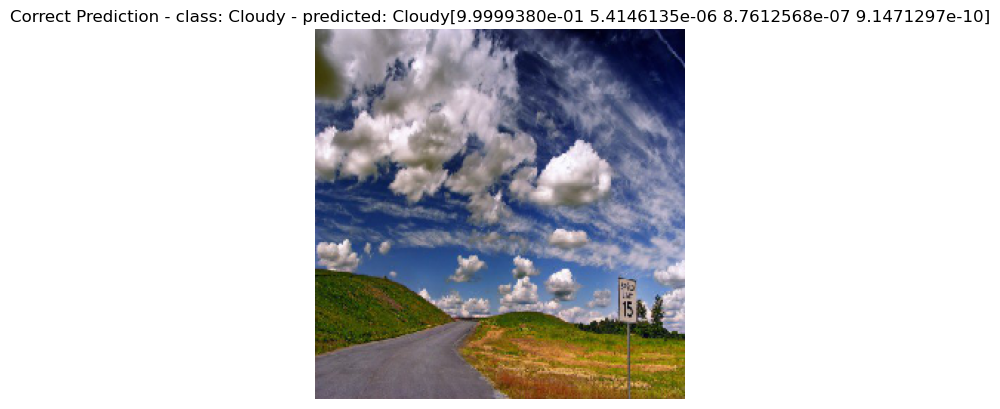

In [17]:
predict_one(model, 10) #<--you can show multiple pictures with this command. Just fill in the number you want to see.